Code for combining multiple structure files into one large simulation .xyz file.

Associated manuscript: "Effects of the Encapsulation Membrane in *operado* Scanning Transmission Electron Microscopy." Kunmo Koo, Stephanie M. Ribet, Chi Zhang, Paul Smeets, Roberto dos Reis, Xiaobing Hu and Vinayak P. Dravid

Notebook written by Stephanie Ribet, Kunmo Koo, Xiaobing Hu and Vinayak P. Dravid at the [VPD Group](https://vpd.ms.northwestern.edu/) and [NU*ANCE* Center](http://www.nuance.northwestern.edu/) at Northwestern University. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
carbon=np.loadtxt('carbon.csv',delimiter=',')*[67.87, 67.87, 67.87]*1.1 #1.1 makes up for density

In [9]:
carbon=carbon-[np.min(carbon[:,0]),np.min(carbon[:,1]),np.min(carbon[:,2])]

In [10]:
carbon = np.delete(carbon, (carbon[:,0]>50), axis=0)
carbon = np.delete(carbon, (carbon[:,1]>25), axis=0)

In [11]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN=carbon+(noise-0.5)*0.1
for i in range(0,1): #increase to increase membrane thickness
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN=np.concatenate([SiN,carbon2])

In [12]:
element_random=np.random.random_sample([SiN.shape[0],1])
elements=14*np.ones([SiN.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN=np.concatenate([elements,SiN],axis=1)

In [13]:
Au=np.loadtxt('particle.csv',delimiter=',')
Au=Au-[np.min(Au[:,0]),np.min(Au[:,1]),np.min(Au[:,2])]

In [15]:
cellmax=np.max(SiN[:,3])

76.38106435570458


In [16]:
Au=Au+[0,0,cellmax]

92.41106435570458

In [18]:
elements=np.ones([Au.shape[0],1])
elements=elements.astype('object')
elements[0:170]='Bi'
elements[170:170+168]='Cu'
elements[170+168:170+168*2]='O'
elements[170+168*2:170*2+168*2]='S'

Au=np.concatenate([elements,Au],axis=1)

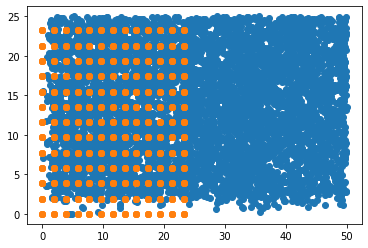

In [19]:
fig, ax = plt.subplots()
ax.scatter(SiN[:,1], SiN[:,2])
ax.scatter(Au[:,1], Au[:,2])
plt.show()

In [20]:
stack=np.concatenate([SiN,Au])

In [21]:
density=760*5e-7/62.36/293*1000*1e-20*6.02*1e23

In [22]:
atoms_gas=int(density*50*25)

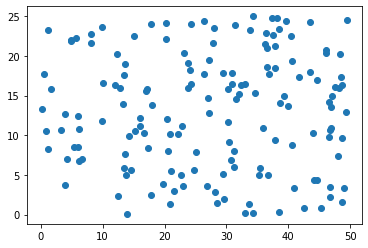

In [23]:
cellmax1=np.max(stack[:,3])
gx=np.random.uniform(0,50,atoms_gas)
gy=np.random.uniform(0,25,atoms_gas)
gz=0.1*np.random.uniform(0,50,atoms_gas)+cellmax1

gas=np.zeros([atoms_gas,3])
gas[:,0]=gx
gas[:,1]=gy
gas[:,2]=gz

fig,ax=plt.subplots()
ax.scatter(gas[:,0], gas[:,1])
plt.show()

In [24]:
elements=np.ones([gas.shape[0],1])
elements=elements.astype('object')
elements[elements>3/7]='Ar'

gas=np.concatenate([elements,gas],axis=1)

In [25]:
stack=np.concatenate([stack,gas])

In [26]:
cellmax2=np.max(stack[:,3])
print(cellmax2)

97.40144995118494


In [27]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN2=carbon+(noise-0.5)*0.1
for i in range(0,1):
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN2=np.concatenate([SiN2,carbon2])

In [28]:
SiN2=SiN2+[0,0,cellmax2]

In [29]:
element_random=np.random.random_sample([SiN2.shape[0],1])
elements=14*np.ones([SiN2.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN2=np.concatenate([elements,SiN2],axis=1)

In [30]:
stack=np.concatenate([stack,SiN2])

In [31]:
np.savetxt("stack.xyz", stack, fmt='%s %.2f %.2f %.2f',delimiter=" ")

(13352, 4)


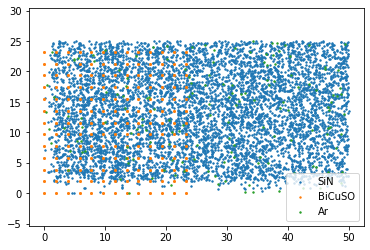

In [32]:
fig, ax = plt.subplots()
ax.scatter(SiN[:,1], SiN[:,2],s=2, label='SiN')
ax.scatter(Au[:,1], Au[:,2],s=2, label='BiCuSO')
ax.scatter(gas[:,1], gas[:,2], s=2, label='Ar')
ax.axis('equal') 
ax.legend()
plt.show()